# ressources

* https://medium.com/@mariano.scandizzo/strategic-asset-allocation-with-python-c9afef392e90
* https://github.com/mscandizzo/PortfolioTheory/blob/master/Portfolio.ipynb

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from optimizer import Optimizer
plt.style.use('ggplot')

In [4]:
df = pd.read_excel('./Data_QAM2.xlsx')
df.index = df['Dates']
del df['Dates']
df.head(10)

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
Dates,,,,,,,
2000-10-31,1282.14,101.57,348.778,390.235,265.15,171.0312,74.2191
2000-11-30,1203.05,103.39,353.744,378.009,270.45,200.4858,74.2632
2000-12-29,1221.25,104.76,360.663,386.206,272.25,212.1430,74.5400
2001-01-31,1244.22,105.98,370.170,409.237,265.85,199.2194,75.9267
2001-02-28,1137.88,107.03,373.802,415.700,267.15,196.6439,73.2996
2001-03-30,1061.26,107.74,376.700,410.200,257.95,193.3921,68.9111
2001-04-30,1138.09,107.01,374.727,405.719,264.05,209.1450,70.9887
2001-05-31,1121.09,107.57,378.556,413.527,265.85,200.8408,69.8542
2001-06-29,1084.79,108.18,380.266,404.998,270.85,176.5319,65.5896


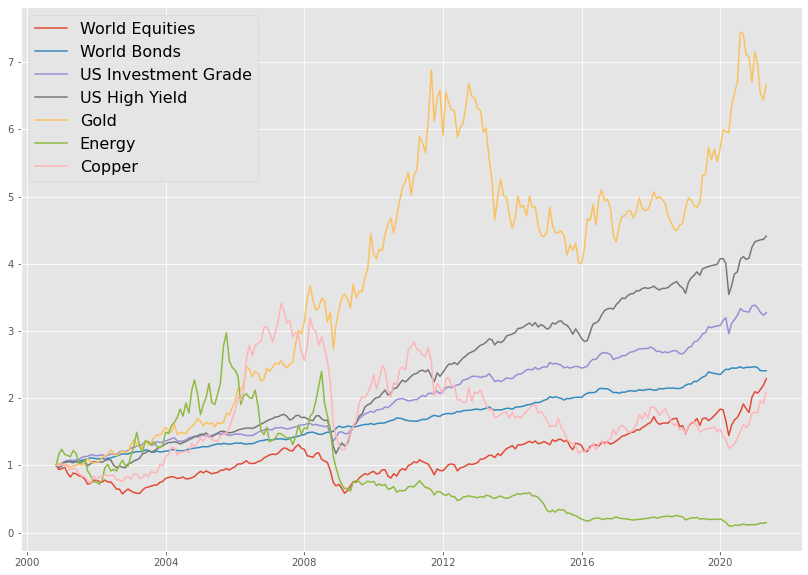

In [63]:
normalized_series = (df/df.iloc[0])
fig2 =plt.figure(figsize=(14,10))

plt.plot(normalized_series)
plt.legend(normalized_series.columns,fontsize = 16)

In [60]:
#monthly data
numb_month = 12
datos_returns = np.log(df/df.shift(1))
datos_returns.dropna(inplace=True)
stats = pd.DataFrame()
stats['Annualized Returns(%)'] =datos_returns.mean() * numb_month *100
stats['Annualized Volatility(%)'] = datos_returns.std() * np.sqrt(numb_month)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']
print(82*'-')
print('Assets Classes Annualized Statistics — full observation period')
stats.style.bar(color=['red','green'], align='zero')

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics — full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
World Equities,4.046133,15.763206,0.256682
World Bonds,4.290191,2.824307,1.519024
US Investment Grade,5.784713,5.671868,1.019895
US High Yield,7.240824,9.358927,0.773681
Gold,9.258280,16.492228,0.561372
Energy,-9.280398,30.363456,-0.305644
Copper,3.598280,21.717175,0.165688


Text(0.5, 1.0, 'Copper')

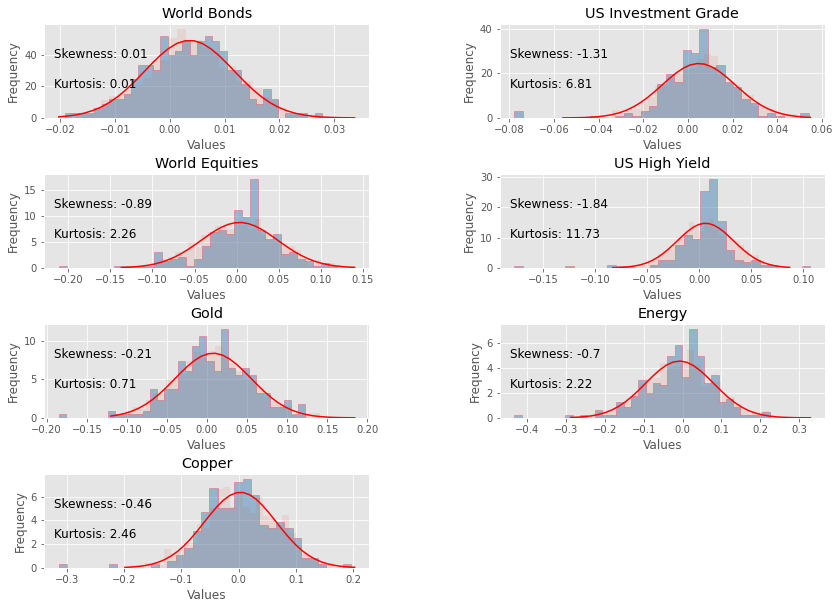

In [77]:
binsnumber = 35

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.6,wspace=.4) # it adds space in between plots
plt.subplot(423)
ax = plt.gca()

ax.hist(datos_returns['World Equities'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['World Equities'].std(),datos_returns['World Equities'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['World Equities'].skew(),2),round(datos_returns['World Equities'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('World Equities')

plt.subplot(421)
ax1 = plt.gca()
ax1.hist(datos_returns['World Bonds'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['World Bonds'].std(),datos_returns['World Bonds'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['World Bonds'].skew(),2),round(datos_returns['World Bonds'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('World Bonds')

plt.subplot(422)
ax = plt.gca()
ax.hist(datos_returns['US Investment Grade'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['US Investment Grade'].std(),datos_returns['US Investment Grade'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['US Investment Grade'].skew(),2),round(datos_returns['US Investment Grade'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('US Investment Grade')

plt.subplot(424)
ax = plt.gca()
ax.hist(datos_returns['US High Yield'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['US High Yield'].std(),datos_returns['US High Yield'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['US High Yield'].skew(),2),round(datos_returns['US High Yield'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('US High Yield')


plt.subplot(425)
ax = plt.gca()
ax.hist(datos_returns['Gold'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['Gold'].std(),datos_returns['Gold'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['Gold'].skew(),2),round(datos_returns['Gold'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Gold')

plt.subplot(426)
ax = plt.gca()
ax.hist(datos_returns['Energy'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['Energy'].std(),datos_returns['Energy'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['Energy'].skew(),2),round(datos_returns['Energy'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Energy')

plt.subplot(427)
ax = plt.gca()
ax.hist(datos_returns['Copper'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['Copper'].std(),datos_returns['Copper'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['Copper'].skew(),2),round(datos_returns['Copper'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(10,30),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Copper')



In [28]:
df_return = (np.log(df) - np.log(df.shift(1))).dropna()
df_return

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
Dates,,,,,,,
2000-11-30,-0.063671,0.017760,0.014138,-0.031831,0.019792,0.158897,0.000594
2000-12-29,0.015015,0.013164,0.019371,0.021453,0.006634,0.056517,0.003720
2001-01-31,0.018634,0.011578,0.026018,0.057924,-0.023789,-0.062854,0.018433
2001-02-28,-0.089342,0.009859,0.009764,0.015669,0.004878,-0.013012,-0.035213
2001-03-30,-0.069710,0.006612,0.007723,-0.013319,-0.035045,-0.016675,-0.061738
...,...,...,...,...,...,...,...
2020-12-31,0.040550,0.002395,0.004901,0.018945,0.066092,-0.006711,0.003044
2021-01-29,-0.010595,-0.005877,-0.012274,0.003162,-0.027076,0.053196,0.000129
2021-02-26,0.024208,-0.017718,-0.019749,0.003336,-0.063461,0.143165,0.096523


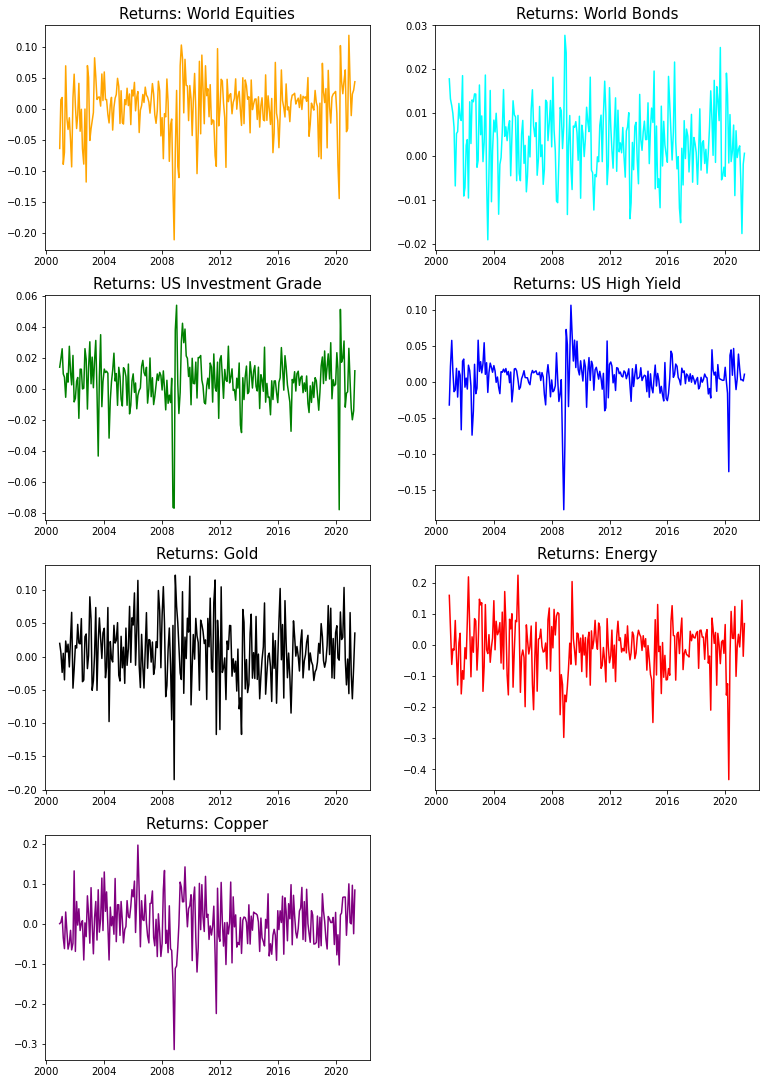

In [15]:
plt.figure(figsize=[6.4*2, 4.8*5])
colors = ['orange', 'cyan', 'green','blue','black','red','purple']
for i in range(df_return.shape[1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_return.index, df_return[df_return.columns[i]].values,c=colors[i])
    plt.title(f'Returns: {df_return.columns[i]}',fontdict={'size':15})

Text(0.5, 1.0, 'Returns of benchmark')

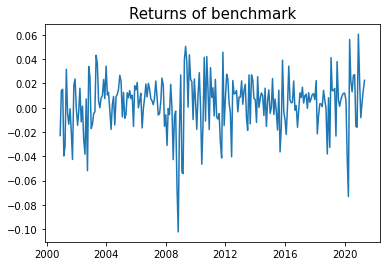

In [19]:
benchmark = (0.5*df_return['World Equities'] + 0.5*df_return['World Bonds'])
plt.plot(benchmark.index,benchmark.values)
plt.title(f'Returns of benchmark',fontdict={'size':15})
#benchmark.plot()

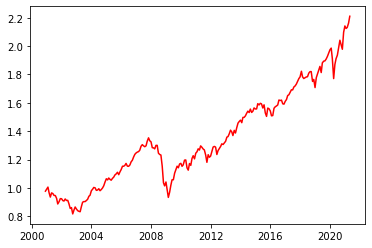

In [42]:
pnl = np.cumprod(1+benchmark.values)
plt.plot(benchmark.index,pnl,c='red')

In [30]:
df_insample = df_return[df_return.index <= pd.to_datetime("2010-11-30")]
df_outsample = df_return[df_return.index > pd.to_datetime("2010-11-30")]
df_outsample

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
Dates,,,,,,,
2010-12-31,0.069974,-0.004181,-0.009528,0.017030,0.025054,0.078672,0.118724
2011-01-31,0.021646,-0.004673,0.002367,0.020541,-0.064450,0.010435,0.016593
2011-02-28,0.032766,-0.000119,0.007060,0.013156,0.057341,-0.014012,0.024040
2011-03-31,-0.012447,-0.001246,0.000275,0.004082,0.014679,0.070172,-0.038792
2011-04-29,0.039432,0.007099,0.016838,0.014934,0.087843,0.057230,-0.005110
...,...,...,...,...,...,...,...
2020-12-31,0.040550,0.002395,0.004901,0.018945,0.066092,-0.006711,0.003044
2021-01-29,-0.010595,-0.005877,-0.012274,0.003162,-0.027076,0.053196,0.000129
2021-02-26,0.024208,-0.017718,-0.019749,0.003336,-0.063461,0.143165,0.096523


# The SAA

In [31]:
df_insample.describe()

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,-0.000592,0.004264,0.005641,0.006679,0.013670,-0.003800,0.007301
std,0.050064,0.008424,0.018050,0.032583,0.047893,0.096383,0.070270
min,-0.211271,-0.019150,-0.076682,-0.177376,-0.185000,-0.297197,-0.313855
25%,-0.023737,-0.001225,-0.003846,-0.007084,-0.016563,-0.064071,-0.040384
50%,0.006707,0.005209,0.007370,0.010947,0.018983,-0.004461,0.003720
75%,0.029626,0.009505,0.014077,0.020176,0.046774,0.064136,0.055911
max,0.103493,0.027748,0.054048,0.106781,0.122339,0.223734,0.196809


<AxesSubplot:>

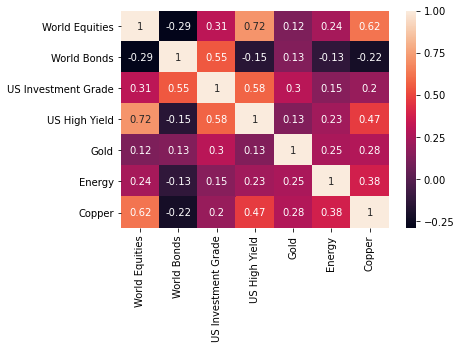

In [35]:
sns.heatmap(df_insample.corr(),annot=True)

In [40]:
sigma = np.cov(df_insample.values)
sigma

array([[ 4.88520657e-03,  9.56218500e-04, -2.27719326e-03, ...,
        -5.71279409e-04, -9.92518722e-04,  8.36985357e-04],
       [ 9.56218500e-04,  3.08141875e-04, -3.92421302e-04, ...,
        -1.31401422e-04, -2.17721295e-04,  1.29874636e-04],
       [-2.27719326e-03, -3.92421302e-04,  1.51134594e-03, ...,
        -1.27880228e-04,  2.63861588e-04, -4.98011374e-04],
       ...,
       [-5.71279409e-04, -1.31401422e-04, -1.27880228e-04, ...,
         1.45046578e-03,  3.89038963e-04, -1.45284158e-04],
       [-9.92518722e-04, -2.17721295e-04,  2.63861588e-04, ...,
         3.89038963e-04,  3.86794582e-04, -4.83351309e-05],
       [ 8.36985357e-04,  1.29874636e-04, -4.98011374e-04, ...,
        -1.45284158e-04, -4.83351309e-05,  2.78221146e-04]])

# The TAA